<a href="https://colab.research.google.com/github/ChristianPolito/Data-analyst-training/blob/main/Challenge_NLP1_2_3_WCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP 1 





- Import NLTK and download the functions you will need (as you go along if necessary).
- Get the text of a press article of your choice from the internet (in English it will be easier, but you can take the language of your choice). Assign it to a variable by copying and pasting it into your notebook. For the sake of simplicity, we advise you to take a text that is between 10 and 30 lines long. 
- Transform your text into sentence tokens
- Transform your text into word tokens
- Count the frequency of occurrence of each word and make a graph (if possible a bar chart) representing the 20 most frequent words in your text. Are there many words that seem like stop words to you?
- Remove the stop words and punctuation, and look again at which words are most present. Again, make the same graph to compare.

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
# regex for removing punctuation!
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#text from BBC
text= "Sweden's first female prime minister has been reappointed to the top job after political turmoil forced her to resign within hours of taking the post last week. MPs backed Social Democratic Party leader Magdalena Andersson by a narrow margin in a new vote on Monday. She will attempt to lead a one-party government until an election in September next year. She stood down as prime minister last Thursday after her coalition collapsed. Just hours earlier, Ms Andersson had been elected as Sweden's first female prime minister by a single vote in parliament. But the 54-year-old economist's plan for forming a new coalition government with the Green Party was thrown into disarray when her budget proposal failed to pass. Sweden's first female PM resigns hours after appointment. Instead, parliament voted for a budget drawn up by a group of opposition parties, including the far-right Sweden Democrats. The Green Party said it would not accept a budget drafted by the far-right and walked away from the government, leading to its demise. By convention, the prime minister in Sweden is expected to resign if a coalition party leaves government. In Monday's vote in Sweden's parliament, the Riksdag, 101 of its 349 members voted yes, 75 abstained and 173 voted no. To be appointed prime minister under Sweden's political system, a candidate only needs to avoid a majority voting against them. At a news conference after the vote, Ms Andersson said she was ready to 'take Sweden forward' with a programme focused on welfare, climate change and crime. But without the support of other parties, Ms Andersson will struggle to pass legislation in parliament, where the centre-left Social Democrats hold 100 of 349 seats."

In [ ]:
text = str(text)
text

"Sweden's first female prime minister has been reappointed to the top job after political turmoil forced her to resign within hours of taking the post last week. MPs backed Social Democratic Party leader Magdalena Andersson by a narrow margin in a new vote on Monday. She will attempt to lead a one-party government until an election in September next year. She stood down as prime minister last Thursday after her coalition collapsed. Just hours earlier, Ms Andersson had been elected as Sweden's first female prime minister by a single vote in parliament. But the 54-year-old economist's plan for forming a new coalition government with the Green Party was thrown into disarray when her budget proposal failed to pass. Sweden's first female PM resigns hours after appointment. Instead, parliament voted for a budget drawn up by a group of opposition parties, including the far-right Sweden Democrats. The Green Party said it would not accept a budget drafted by the far-right and walked away from t

#### Tokenize

In [ ]:
#tokenization into sentence.
sentence_token = nltk.sent_tokenize(text)
sentence_token

["Sweden's first female prime minister has been reappointed to the top job after political turmoil forced her to resign within hours of taking the post last week.",
 'MPs backed Social Democratic Party leader Magdalena Andersson by a narrow margin in a new vote on Monday.',
 'She will attempt to lead a one-party government until an election in September next year.',
 'She stood down as prime minister last Thursday after her coalition collapsed.',
 "Just hours earlier, Ms Andersson had been elected as Sweden's first female prime minister by a single vote in parliament.",
 "But the 54-year-old economist's plan for forming a new coalition government with the Green Party was thrown into disarray when her budget proposal failed to pass.",
 "Sweden's first female PM resigns hours after appointment.",
 'Instead, parliament voted for a budget drawn up by a group of opposition parties, including the far-right Sweden Democrats.',
 'The Green Party said it would not accept a budget drafted by the

In [ ]:
#Tokenization into word
text_to_word = nltk.word_tokenize(text)
text_to_word[:10]

['Sweden',
 "'s",
 'first',
 'female',
 'prime',
 'minister',
 'has',
 'been',
 'reappointed',
 'to']

### Frequency distribution

In [ ]:
#Using frequency ditribution and most_comm to identify the 20 most recurring words 
fdist = nltk.FreqDist(text_to_word)
text_to_word_common = fdist.most_common(20)

In [ ]:
text_to_word_common

[('.', 14),
 ('a', 13),
 (',', 13),
 ('the', 12),
 ('to', 9),
 ('Sweden', 8),
 ("'s", 7),
 ('in', 6),
 ('prime', 5),
 ('minister', 5),
 ('of', 5),
 ('after', 4),
 ('Andersson', 4),
 ('by', 4),
 ('vote', 4),
 ('government', 4),
 ('parliament', 4),
 ('first', 3),
 ('female', 3),
 ('her', 3)]

In [ ]:
#Defining a DF to use it for a graph 
most_common_words = pd.DataFrame(text_to_word_common)
most_common_words=most_common_words.rename(columns={0: "Words", 1: "Count"})

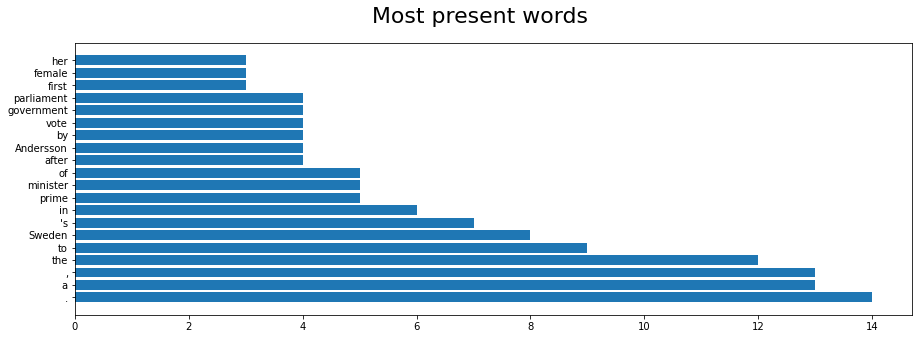

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
fig.suptitle("Most present words", size = 22)
p1 = ax.barh("Words", data=most_common_words, width="Count")


Removing stop words and punctuation 

In [ ]:
stop_words = nltk.corpus.stopwords.words("english")

In [ ]:
# convert to lower case
text_to_word = [w.lower() for w in text_to_word]

In [ ]:
tokens_clean = []
for words in text_to_word:
  if words not in stop_words:
    tokens_clean.append(words)

tokens_clean = str(tokens_clean)

In [ ]:
cleaned = re.sub('\W+', ' ', tokens_clean)
cleaned

' sweden s first female prime minister reappointed top job political turmoil forced resign within hours taking post last week mps backed social democratic party leader magdalena andersson narrow margin new vote monday attempt lead one party government election september next year stood prime minister last thursday coalition collapsed hours earlier ms andersson elected sweden s first female prime minister single vote parliament 54 year old economist s plan forming new coalition government green party thrown disarray budget proposal failed pass sweden s first female pm resigns hours appointment instead parliament voted budget drawn group opposition parties including far right sweden democrats green party said would accept budget drafted far right walked away government leading demise convention prime minister sweden expected resign coalition party leaves government monday s vote sweden s parliament riksdag 101 349 members voted yes 75 abstained 173 voted appointed prime minister sweden s

In [ ]:
cleaned_words = nltk.word_tokenize(cleaned)

In [ ]:
fdist_clean = nltk.FreqDist(cleaned_words)
most_common_words_clean = fdist_clean.most_common(20)


In [ ]:
#The twenty most common words after removing punctuation and stop words 
most_common_words_clean

[('sweden', 8),
 ('s', 7),
 ('prime', 5),
 ('minister', 5),
 ('party', 5),
 ('andersson', 4),
 ('vote', 4),
 ('government', 4),
 ('parliament', 4),
 ('first', 3),
 ('female', 3),
 ('hours', 3),
 ('coalition', 3),
 ('ms', 3),
 ('budget', 3),
 ('voted', 3),
 ('political', 2),
 ('resign', 2),
 ('last', 2),
 ('social', 2)]

In [ ]:
most_common_words_clean = pd.DataFrame(most_common_words_clean)
most_common_words_clean = most_common_words_clean.rename(columns={0: "Words", 1: "Count"})


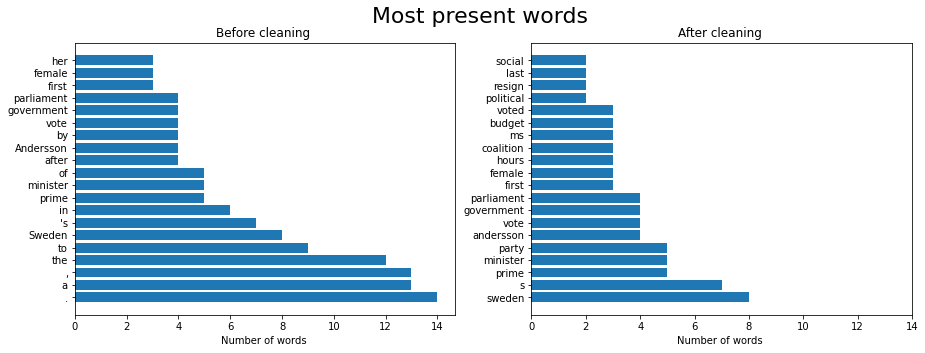

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
fig.suptitle("Most present words", size = 22)

ax1 = plt.subplot(121) 
ax1.barh("Words", data=most_common_words, width="Count")
ax1.set_title("Before cleaning ")
ax1.set_xlabel("Number of words ")
ax1.set_xticks(range(0,15,2))

ax2 = plt.subplot(122)
ax2.barh("Words", data=most_common_words_clean, width="Count")
ax2.set_title("After cleaning ")
ax2.set_xlabel("Number of words ")
ax2.set_xticks(range(0,15,2))

plt.show()

# **NLP 2**



*   A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni 
ponctuation, utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le stemmer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?

*   A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un lemmatizer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le lemmatizer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?






**Stemming**

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
stem_en = SnowballStemmer('english')

stemmed_words = [stem_en.stem(word) for word in cleaned_words]

In [ ]:
fd_stemmed = nltk.FreqDist(stemmed_words)
fd_stemmed_common = fd_stemmed.most_common(20)



In [ ]:
fd_stemmed_common = pd.DataFrame(fd_stemmed_common)


In [ ]:
fd_stemmed_common = fd_stemmed_common.rename(columns={0: "Words", 1: "Count"})
fd_stemmed_common

,Words,Count
0,sweden,8
1,vote,8
2,s,7
3,parti,7
4,prime,5
5,minist,5
6,andersson,4
7,govern,4
8,parliament,4
9,first,3


**Lemmatizing**

In [ ]:
import nltk
nltk.download('wordnet')
lemma = nltk.WordNetLemmatizer()
clean_lemmatized = [lemma.lemmatize(w) for w in cleaned_words]
sorted(clean_lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['100',
 '101',
 '173',
 '349',
 '349',
 '54',
 '75',
 'abstained',
 'accept',
 'andersson',
 'andersson',
 'andersson',
 'andersson',
 'appointed',
 'appointment',
 'attempt',
 'avoid',
 'away',
 'backed',
 'budget',
 'budget',
 'budget',
 'candidate',
 'centre',
 'change',
 'climate',
 'coalition',
 'coalition',
 'coalition',
 'collapsed',
 'conference',
 'convention',
 'crime',
 'demise',
 'democrat',
 'democrat',
 'democratic',
 'disarray',
 'drafted',
 'drawn',
 'earlier',
 'economist',
 'elected',
 'election',
 'expected',
 'failed',
 'far',
 'far',
 'female',
 'female',
 'female',
 'first',
 'first',
 'first',
 'focused',
 'forced',
 'forming',
 'forward',
 'government',
 'government',
 'government',
 'government',
 'green',
 'green',
 'group',
 'hold',
 'hour',
 'hour',
 'hour',
 'including',
 'instead',
 'job',
 'last',
 'last',
 'lead',
 'leader',
 'leading',
 'leaf',
 'left',
 'legislation',
 'm',
 'm',
 'm',
 'magdalena',
 'majority',
 'margin',
 'member',
 'minister',
 'mi

In [ ]:
fd_lemma = nltk.FreqDist(clean_lemmatized)
fd_lemma_common = fd_lemma.most_common(20)
fd_lemma_common

[('sweden', 8),
 ('s', 7),
 ('party', 7),
 ('prime', 5),
 ('minister', 5),
 ('andersson', 4),
 ('vote', 4),
 ('government', 4),
 ('parliament', 4),
 ('first', 3),
 ('female', 3),
 ('hour', 3),
 ('coalition', 3),
 ('m', 3),
 ('budget', 3),
 ('voted', 3),
 ('political', 2),
 ('resign', 2),
 ('last', 2),
 ('social', 2)]

In [ ]:
fd_lemma_common = pd.DataFrame(fd_lemma_common)
fd_lemma_common = fd_lemma_common.rename(columns={0: "Words", 1: "Count"})

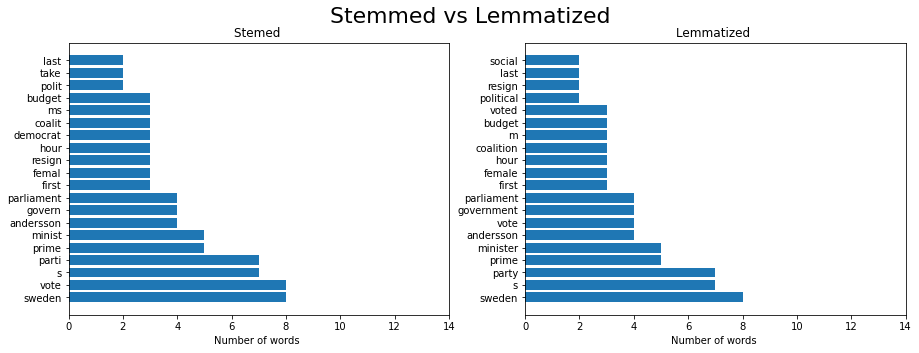

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
fig.suptitle("Stemmed vs Lemmatized ", size = 22)

ax1 = plt.subplot(121) 
ax1.barh("Words", data=fd_stemmed_common, width="Count")
ax1.set_title("Stemed ")
ax1.set_xlabel("Number of words ")
ax1.set_xticks(range(0,15,2))

ax2 = plt.subplot(122)
ax2.barh("Words", data=fd_lemma_common, width="Count")
ax2.set_title("Lemmatized ")
ax2.set_xlabel("Number of words ")
ax2.set_xticks(range(0,15,2))

plt.show()

# NLP 3

Un WordCloud à partir du texte initial, grâce à la méthode generate_from_text

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

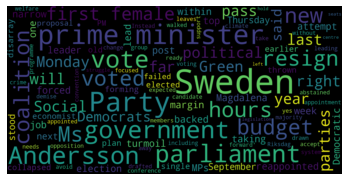

In [ ]:
wordcloud = WordCloud(width=2000, height=1000, max_font_size=200, min_font_size=10)

# Génération du wordcloud depuis un texte
wordcloud.generate_from_text(text)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation



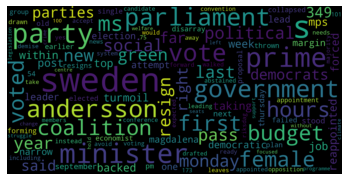

In [ ]:
wordcloud1 = WordCloud(width=2000, height=1000, max_font_size=200, min_font_size=10)

wordcloud1.generate_from_frequencies(fdist_clean)

# Affichage grâce à Matplotlib
plt.figure()
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un stemmer.

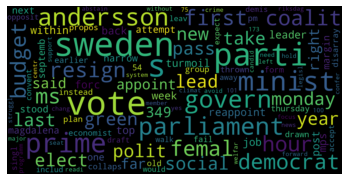

In [ ]:
wordcloud = WordCloud(width=2000, height=1000, max_font_size=200, min_font_size=10)

#dico = nltk.FreqDist([token for token in fd_stemmed])
wordcloud.generate_from_frequencies(fd_stemmed)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Un WordCloud grâce à la méthode generate_from_frequencies après nettoyage des stopwords et de la ponctuation, et application d'un lemmatizer.

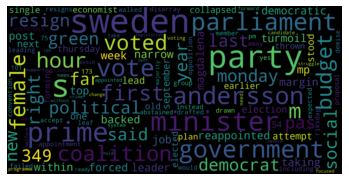

In [ ]:
wordcloud = WordCloud(width=2000, height=1000, max_font_size=200, min_font_size=10)

dico = nltk.FreqDist([token for token in clean_lemmatized])

wordcloud.generate_from_frequencies(dico)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()